# Basic Imports
We are working with PyTorch here, so we have some things that we need to import. Here is what everything does:

1. Module: Used for making a PyTorch module, we make a feedforward module here

2. Linear: Torch layer that implements a simple weighted forward pass, $y = W * x + b$

3. BCEWithLogitsLoss: Implementing a BinaryCrossEntropy loss with an integrated sigmoid function, given by $-\omega_n \times [y_n . log(\sigma(x_n)) + (1- y_n) . log(1 - \sigma(x_n))]$

4. ReLU: An activation function, given my $max(0, x)$

5. Sigmoid: An activation function, given by $\frac{1}{1 - exp(-x)}$

6. Optimizer: Adam, alternative will be stochastic gradient descent

7. DataUtils: The data loader / utility function, made to load in MNIST dataset

In [15]:
import torch
from torch.nn import Module, Linear, BCEWithLogitsLoss, Sigmoid
from torch.optim import Adam
from torch import count_nonzero
from torch.nn.functional import one_hot

from data import DataUtils

from matplotlib import pyplot as plt

# Visualizing the Data

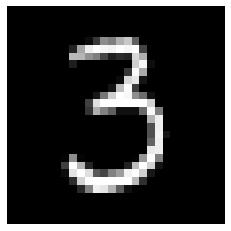

In [20]:
index = 50

# load the train and test datasets
train, test, _ = DataUtils(batch=1).loadTorchDataset()

# make the image from flattened data
image = train.dataset[index][0].reshape(28,28)

# plot
plt.axis('off')
plt.imshow(image, cmap='gray')

# FeedForward Network
We need to make sure that the number of inputs and outputs are correct. We are writing a simple feedforward code.
Linear (ReLU) -> Linear (ReLU) -> Linear (ReLU)

In [32]:
class FeedForward(Module):
    def __init__(self, nodesinp, nodes1, nodes2):
        super().__init__()
        self.ff1 = Linear(nodesinp, nodes1)
        self.ff2 = Linear(nodes1, nodes2)
        self.ff3 = Linear(nodes2, 10)
        self.sig = Sigmoid()

    def forward(self, inp):
        layer1 = self.ff1(inp)
        layer1 = self.sig(layer1)
        layer2 = self.ff2(layer1)
        layer2 = self.sig(layer2)
        layer3 = self.ff3(layer2)
        return layer3

# The Network Class
Writing the network class is pretty simple, we just need to fit in the loss function, optimizer and epochs together, and use what we learnt from the last section as a lesson

In [33]:
class Network:
    def __init__(self, epochs=10, loss=BCEWithLogitsLoss, opt=Adam):
        self.epochs = epochs
        self.learning_rate = 1e-4
        self.model = FeedForward(784, 500, 20)
        self.trainData, self.testData, self.testLabels = DataUtils(batch=10).loadTorchDataset()
        self.optimizer = opt(self.model.parameters(), lr=self.learning_rate)
        self.lossfn = loss()
        

    def train(self):
        print(f'\nNOTE: Training model with {self.epochs} epoch(s)')
        model = self.model
        model.train()
        for epochs in range(1, self.epochs + 1):
            for batch_idx, (data, target) in enumerate(self.trainData):
                opt = self.optimizer
                lossfn = self.lossfn
                output = model(data)
                opt.zero_grad()
                one_hot_target = one_hot(target.type('torch.LongTensor'), num_classes=10)
                loss = lossfn(output, one_hot_target.type('torch.FloatTensor'))
                loss.backward()
                opt.step()
            print(f'(epoch {epochs}): completed with loss {loss.item()}')
        print('NOTE: Training complete')

    def test(self):
        print('\nNOTE: Testing model')
        model = self.model
        data, target = self.testData, self.testLabels
        prediction = model(data)
        _, prediction = torch.max(prediction, dim=1)
        accTensor = prediction - target
        inaccuracy = (count_nonzero(accTensor) / data.shape[0]) * 100
        print(f'NOTE: Accuracy on the testing set is {100 - inaccuracy.item()}%')

# Training The Model

In [34]:
net = Network(epochs=5)
print('NOTE: The model summary is given below:')
print(net.model)
net.train()
net.test()

NOTE: The model summary is given below:
FeedForward(
  (ff1): Linear(in_features=784, out_features=500, bias=True)
  (ff2): Linear(in_features=500, out_features=20, bias=True)
  (ff3): Linear(in_features=20, out_features=10, bias=True)
  (sig): Sigmoid()
)

NOTE: Training model with 5 epoch(s)
(epoch 1): completed with loss 0.22959226369857788
(epoch 2): completed with loss 0.10943304002285004
(epoch 3): completed with loss 0.09881990402936935
(epoch 4): completed with loss 0.023753397166728973
(epoch 5): completed with loss 0.0461372509598732
NOTE: Training complete

NOTE: Testing model
NOTE: Accuracy on the testing set is 95.42000007629395%
